# Advanced Visualization Part 1

## Downloading and Prepping Data

In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
!conda install -c anaconda xlrd --yes

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df_can.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df_can.shape

(195, 43)

## Membersihkan data

In [6]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns = {'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

#mengubah tipe menjadi string
df_can.columns=list(map(str, df_can.columns))

#mengubah nama country menjadi index- berguna untuk mempercepat penggunaan .loc
df_can.set_index('Country', inplace=True)

#menambahkan kolom total
df_can['Total']=df_can.sum(axis=1)

#membuat variabel years dan mengubah ke string
years = list(map(str, range(1980,2014)))

print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


C:\Users\Kirei\AppData\Local\Temp\ipykernel_18796\1156202941.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total']=df_can.sum(axis=1)


## Visualizing Data using Matplotlib

import matplotlib:

In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches    #for waffle charts

mpl.style.use('ggplot')

print('matplotlib version:', mpl.__version__)

matplotlib version: 3.5.3


## Waffle Charts

In [8]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


#### Step 1: Menentukan proporsi setiap kategori sehubungan dengan totalnya

In [9]:
total_values = sum(df_dsn['Total'])
category_proporsions = [(float(value)/total_values) for value in df_dsn['Total']]

for i, proportion in enumerate(category_proporsions):
    print(df_dsn.index.values[i] + ':' +str(proportion))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


#### Step 2: Menentukan ukuran keseluruhan dari waffle chart

In [10]:
width = 40
height = 10

total_num_tiles = width * height

print('Total number of tiles is', total_num_tiles)

Total number of tiles is 400


#### Step 3: Menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing-masing kategori

In [11]:
tiles_per_category = [round(proportion*total_num_tiles) for
                     proportion in category_proporsions]

for i, tiles in enumerate (tiles_per_category) :
    print (df_dsn.index.values[i] + ':' +str(tiles))

Denmark:129
Norway:77
Sweden:194


berdasarkan proporsi yg dihitung, Denmark akan menempati 129 ubin, Norwegia akan menempati 77 ubin, dan Swedia akan menempati 194 ubin.

#### Step 4: Membuat matriks yang menyerupai wafel dan mengisinya

In [12]:
waffle_chart = np.zeros((height, width))

category_index = 0
title_index = 0

for col in range(width):
    for row in range(height):
        title_index += 1
        
        if title_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
            
        waffle_chart[row, col] = category_index
        
print('Waffle chart populated!')

Waffle chart populated!


In [13]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

#### Step 5: Petakan matriks waffle chart menjadi visual

<Figure size 640x480 with 0 Axes>

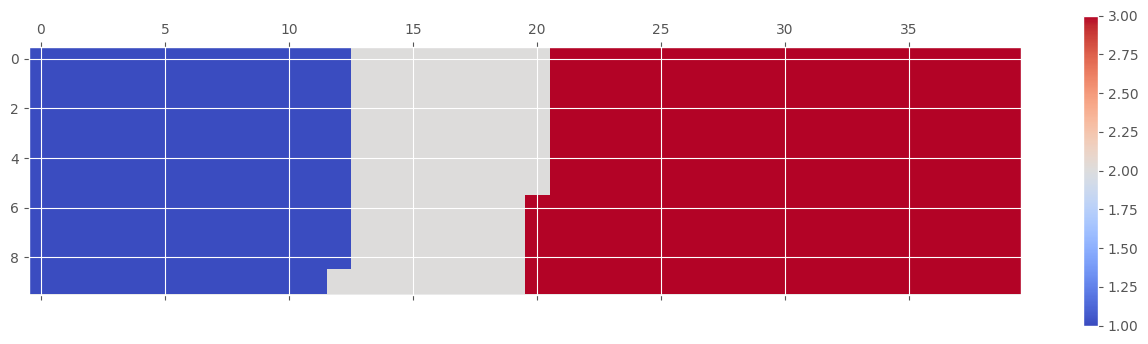

In [14]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()


#### Step 6: Percantik chart

([], [])

<Figure size 640x480 with 0 Axes>

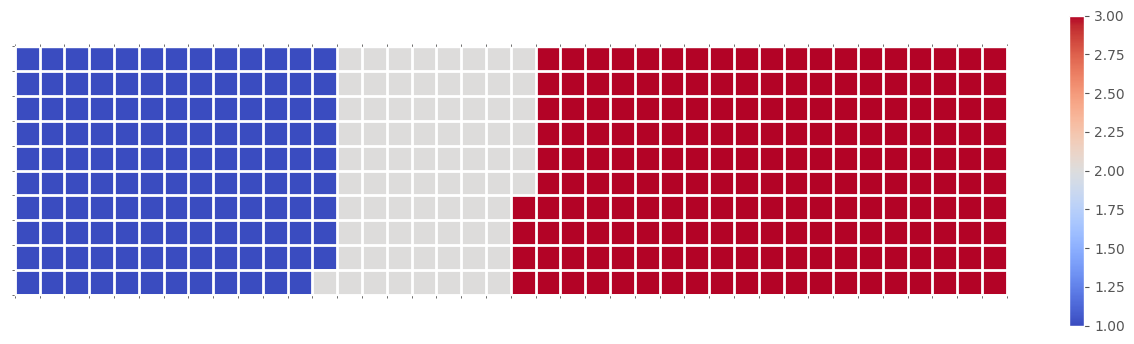

In [15]:
fig = plt.figure()

colormap=plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

#### Step 7: Menambahkan legend

<Figure size 640x480 with 0 Axes>

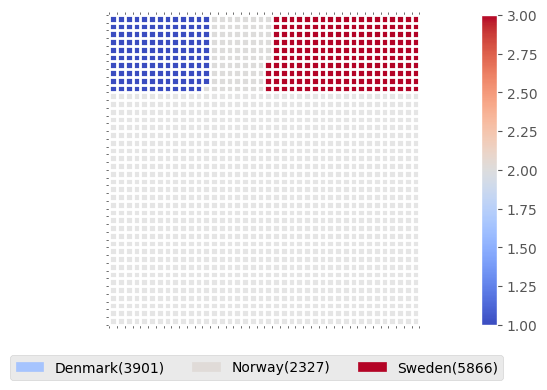

In [16]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (width), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

#create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + '(' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap (float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, 
                                        label=label_str))
    
plt.legend(handles=legend_handles,
          loc='lower center',
          ncol=len(df_dsn.index.values),
          bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

### Membuat Waffle Charts dengan memanggil fungsi create_waffle_Chart

In [17]:
def create_waffle_chart (categories, values, height, width, colormap, value_sign=''):
    
    total_values = sum(values)
    category_proporsions = [(float(value)/total_values) for value in values]
    
    total_num_tiles = width*height
    print('Total number of tiles is', total_num_tiles)
    
    tiles_per_category = [round(proportion*total_num_tiles) for proportion in category_proporsions]
    
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ':' +str(tiles))
    
    waffle_chart = np.zeros((height, width))
    
    category_index = 0
    title_index = 0
    
    for col in range(width):
        for row in range (height):
            title_index += 1
            
            if title_index > sum(tiles_per_category[0: category_index]):
                category_index += 1
                
            waffle_chart[row, col] = category_index
            
    fig = plt.figure()
    
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()
    
    ax = plt.gca()
    
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    
    plt.xticks([])
    plt.yticks([])
    
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]
    
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + '(' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + '(' + value_sign + str(values[i]) + ')'
            
        color_val = colormap (float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, 
                                        label=label_str))
    
    plt.legend(
        handles=legend_handles,
          loc='lower center',
          ncol=len(categories),
          bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

In [18]:
#menentukan parameter input:
width = 40
height = 10

categories = df_dsn.index.values
values = df_dsn['Total']

colormap = plt.cm.coolwarm

Total number of tiles is 400
Denmark:129
Norway:77
Sweden:194


<Figure size 640x480 with 0 Axes>

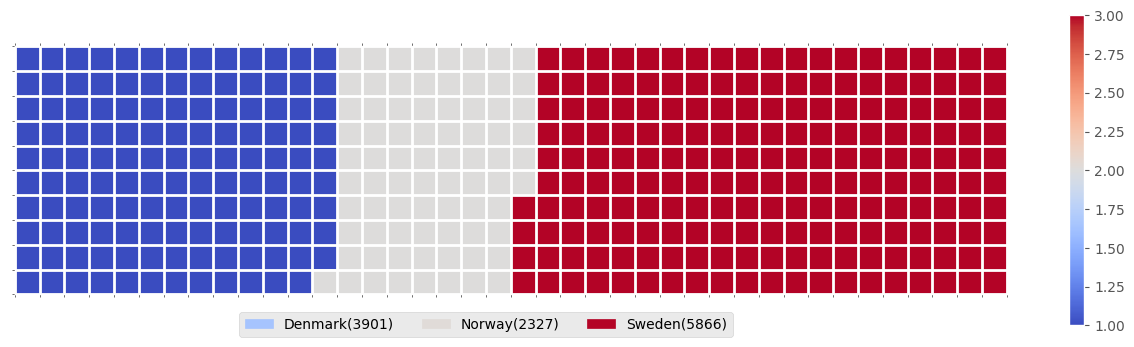

In [19]:
#memanggil fungsi:
create_waffle_chart(categories, values, height, width, colormap)

## Word Clouds

### Instalation

In [20]:
!pip install wordcloud

In [21]:
from wordcloud import WordCloud, STOPWORDS
print('Worcloud is installed and imported!')

Worcloud is installed and imported!


#### Wordcould data imigrasi

In [32]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [33]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [34]:
max_words = 90
word_string =''
for country in df_can.index.values:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(
        total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [35]:
#create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)
print('Word Could created!')

Word Could created!


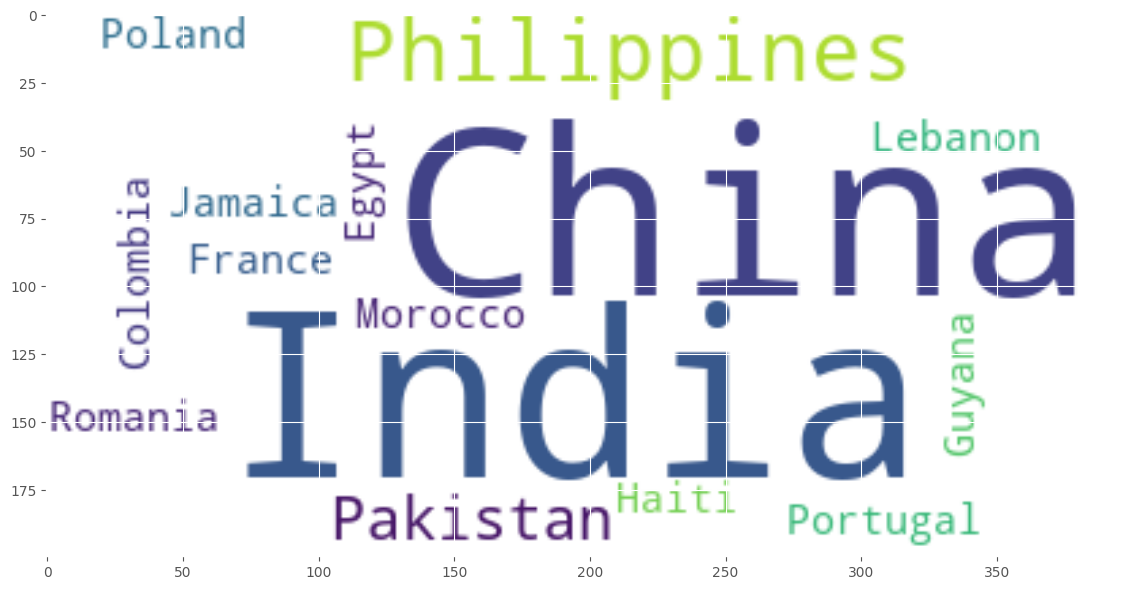

In [36]:
#display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis=('off')
plt.show()

## Regression Plots

In [37]:
!pip install seaborn
import seaborn as sns
print('Seaborn installed and imported!')

Seaborn installed and imported!


In [38]:
df_tot=pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index=map(float, df_tot.index)

df_tot.reset_index(inplace=True)

df_tot.columns=['year','total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


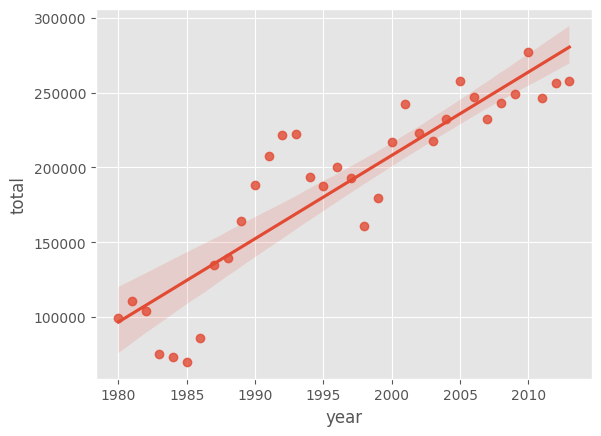

In [39]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

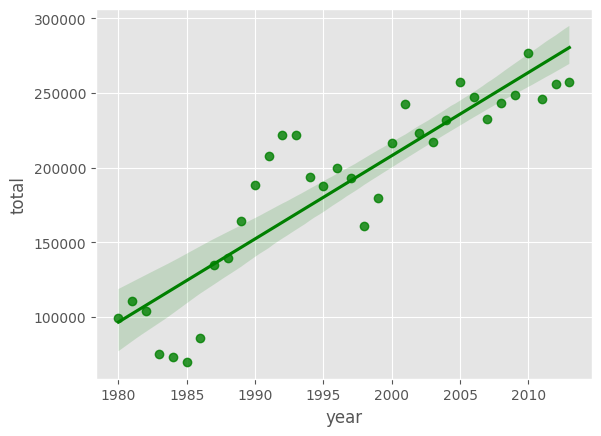

In [40]:
#mengubah warna
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

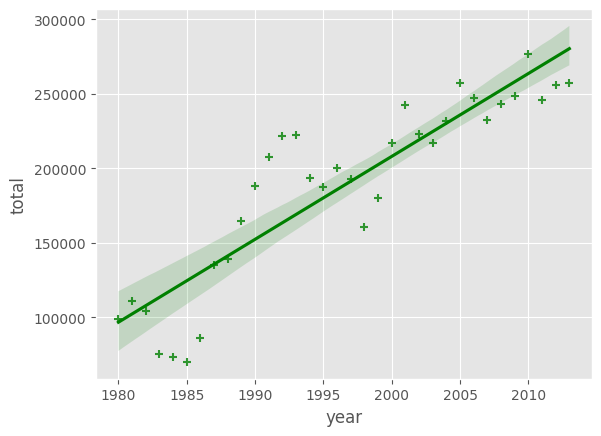

In [41]:
#mengganti marker dengan tanda +
import seaborn as sns
ax=sns.regplot(x='year', y='total', data=df_tot, color='green',
              marker='+')

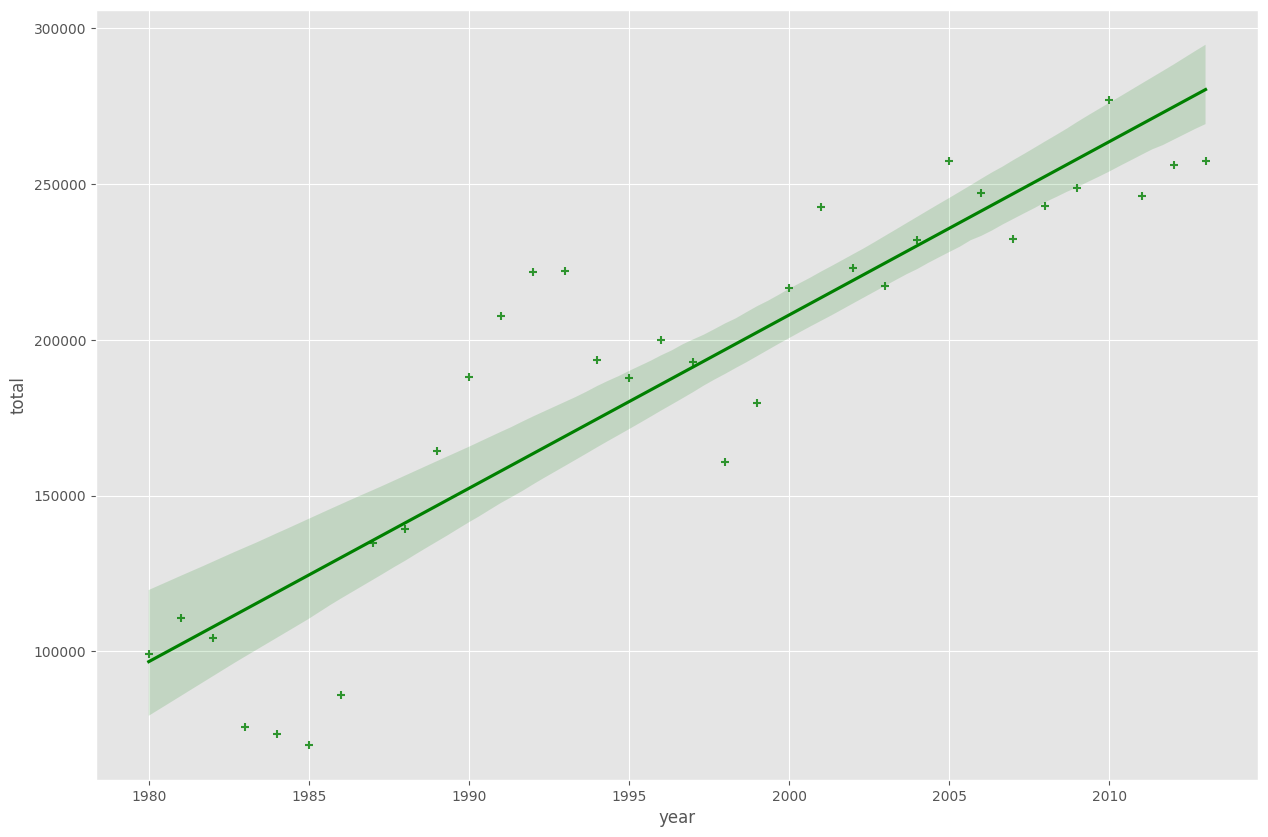

In [42]:
#memperbesar plot
plt.figure(figsize=(15,10))
ax=sns.regplot(x='year', y='total', data=df_tot, color='green', 
              marker='+')

Text(0.5, 1.0, 'Total Immigration to Canda from 1980-2013')

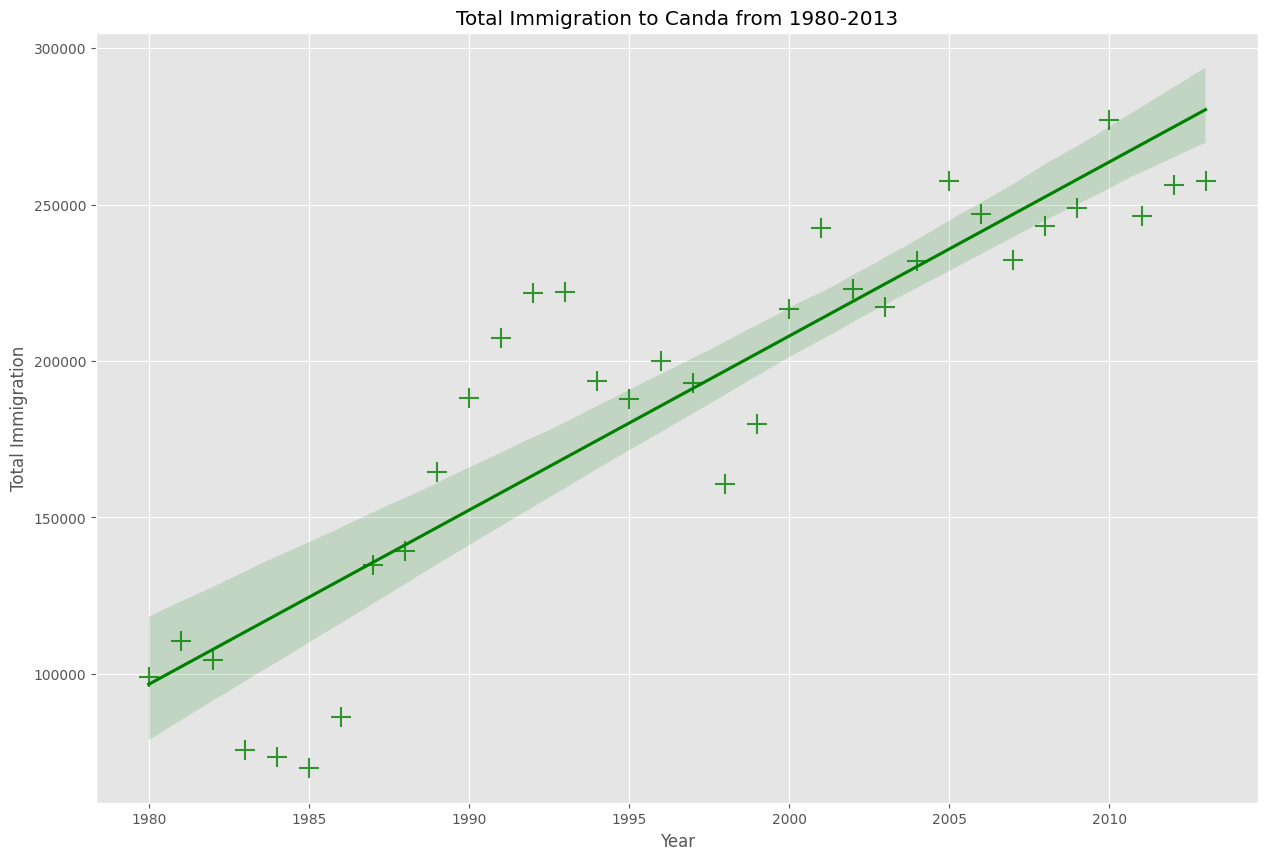

In [43]:
#meningkatkan ukuran marker shg cocok dg ukuran plot yg baru
plt.figure(figsize=(15,10))
ax=sns.regplot(x='year', y='total', data=df_tot, color='green',
              marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canda from 1980-2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

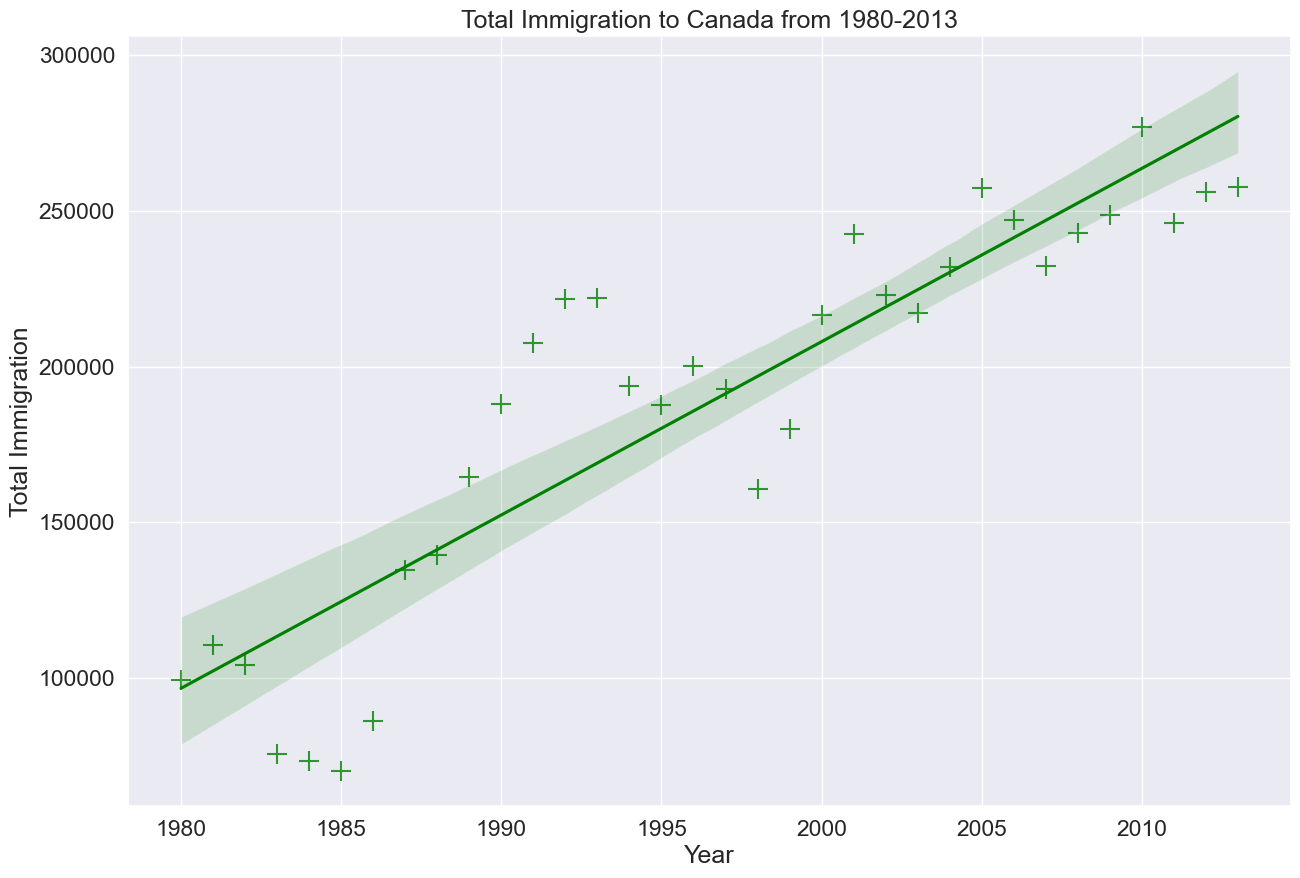

In [44]:
#meningkatkan ukuran font pada label tanda centang, judul, x label dan y label
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)

ax=sns.regplot(x='year', y='total', data=df_tot, color='green',
              marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

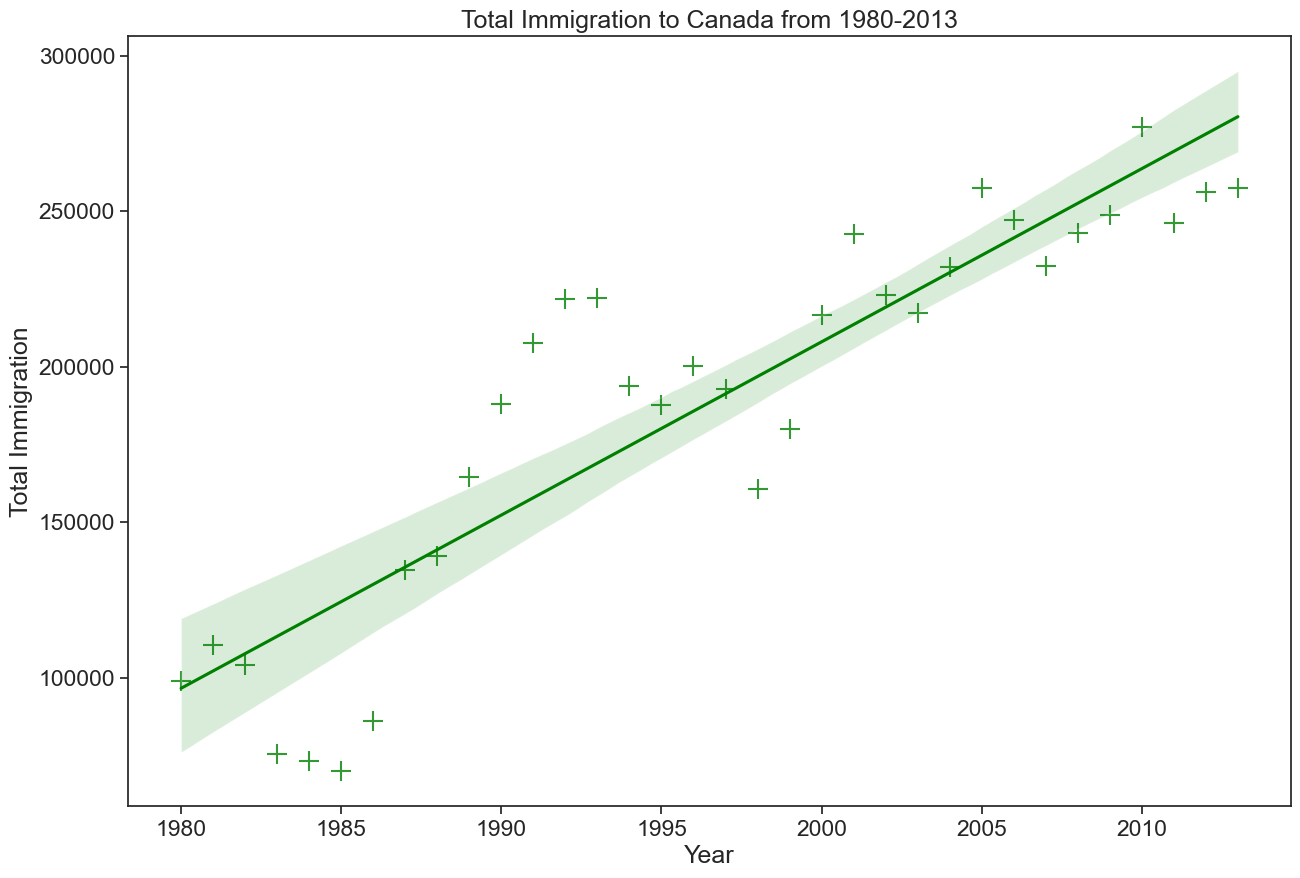

In [45]:
#mengubah background
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('ticks')  #mengubah background menjadi putih

ax=sns.regplot(x='year', y='total', data=df_tot, color='green',
              marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

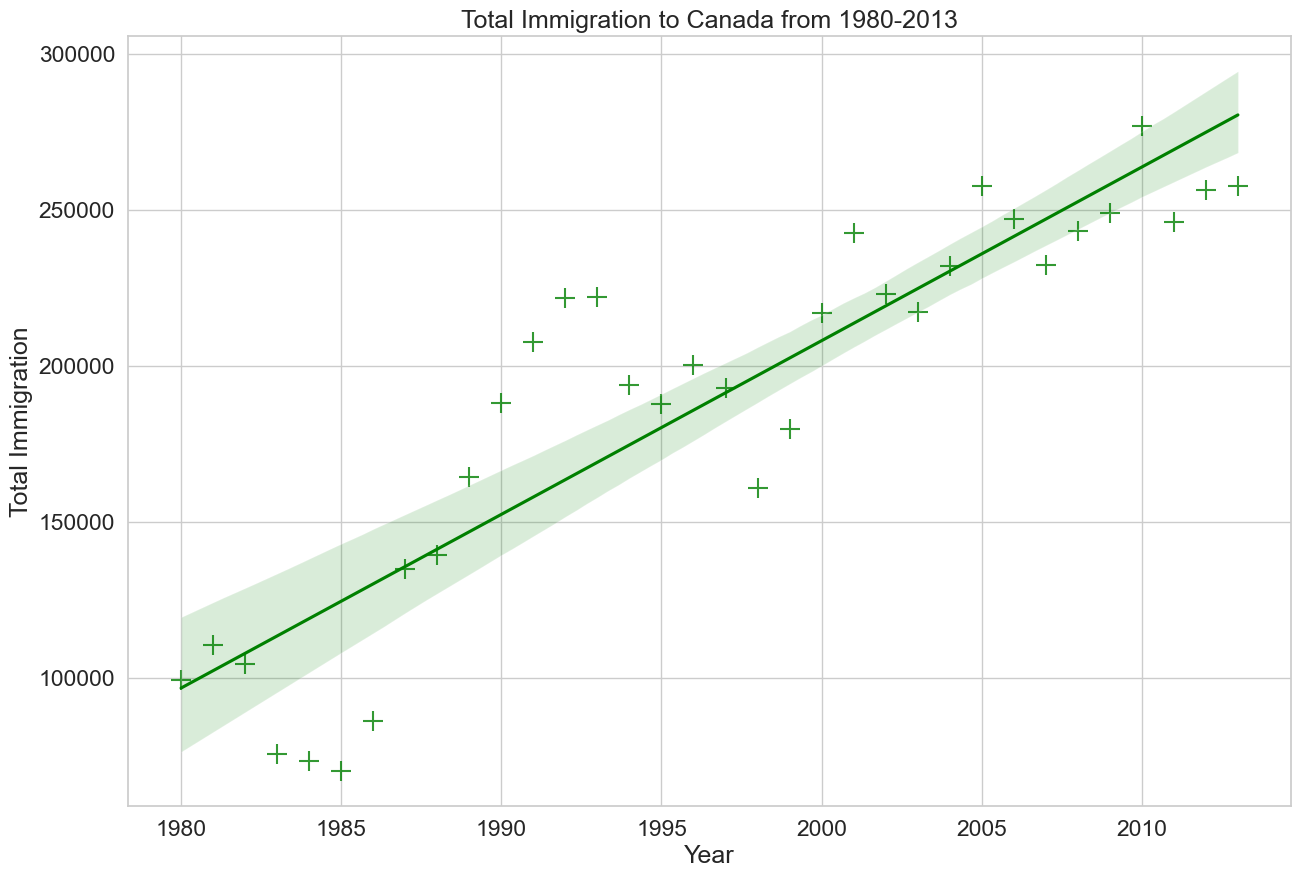

In [46]:
#menambah background putih+garis kisi
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')  #mengubah background menjadi putih

ax=sns.regplot(x='year', y='total', data=df_tot, color='green',
              marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

Text(0.5, 1.0, 'Total Immigration from Denmark, Sweden, and Norway to Canada from 1980-2013')

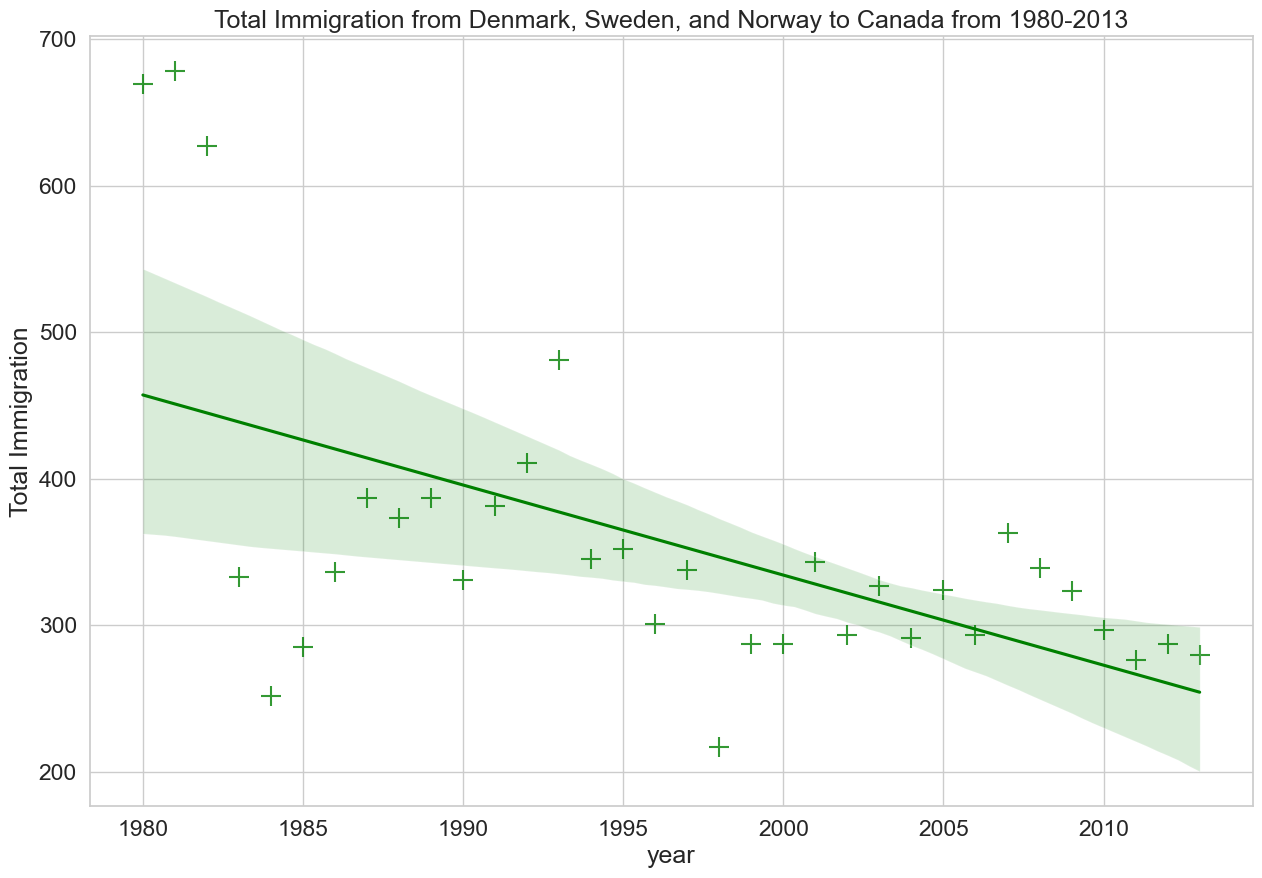

In [47]:
df_countries=df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_total=pd.DataFrame(df_countries.sum(axis=1))

df_total.reset_index(inplace=True)
df_total.columns=['year','total']
df_total['year']= df_total['year'].astype(int)

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax=sns.regplot(x='year', y='total', data=df_total, color='green',
              marker='+', scatter_kws={'s':200})
ax.set(xlabel='year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden, and Norway to Canada from 1980-2013')

# Advanced Visualization Part 2
membuat peta menggunakan Folium

## Downloading and Prepping Data

In [48]:
import numpy as np
import pandas as pd

## Install Folium

In [49]:
!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [50]:
#define the world map
world_map = folium.Map()

#display world map
world_map

membuat peta yang berpusat di sekitar Semarang:

In [51]:
#defined the world map centered around Semarang with a low zoom levek
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=11.428009)

world_map

create a map of Hacktiv8 with a zoom level 15:

In [52]:
world_map=folium.Map(location=[-6.2607187, 106.7794275], zoom_start=15)

world_map

### Stamen Toner Maps
(peta hitam putih)

peta Stamen Toner Semarang dengan tingkat zoom 13:

In [53]:
world_map=folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13,
                    tiles='Stamen Toner')
world_map

### Stamen Terrain Maps
peta yang menampilkan bayangan bukit dan warna vegetasi alami

Peta Stamen Terrain Semarang dengan tingkat zoom 13:

In [54]:
world_map=folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13,
                    tiles='Stamen Terrain')
world_map

## Maps with Markers

mengunduh dan mengimpor data Police departemen menggunakan pandas read_csv()

In [55]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')
print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [56]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


mencari tahu berapa banyak entri di kumpulan data:

In [57]:
df_incidents.shape

(150500, 13)

data diatas terdiri dari 150.500 kejahatan yang terjadi tahun 2016. untuk mengurangi computational cost, maka hanya dibutuhkan 100 insiden pertama dalam kumpulan data diatas

In [58]:
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

mengkonfirmasi bahwa dataframe hanya terdiri dari 100 kejahatan

In [59]:
df_incidents.shape

(100, 13)

setelah mengurangi data, membuat visualisasi dimana kejahatan terjadi di kota San Francisco. akan digunakan gaya default dan menginisialisasi tingkat zoom ke 12

In [60]:
#San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [61]:
#create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sanfran_map

memasukkan lokasi kejahatan ke dalam peta dengan membuat feature group dengan fitur dan gaya sendiri. lalu menambahkannya ke danfran_map

In [62]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
                [lat, lng],
                radius=5,
        
                color='yellow',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6
        )
    )
    
sanfran_map.add_child(incidents)

menambahkan beberapa teks pop-up:

In [63]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
                [lat, lng],
                radius=5,
        
                color='yellow',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6
        )
    )
    
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

sanfran_map.add_child(incidents)

terlihat peta sangat padat karena marker, oleh karena itu ada dua solusi. solusi sederhana dengan menghapus marker lokasi ini dan menambahkan teks ke marker lingkaran:

In [64]:
#create map and display it
sanfran_map=folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label in zip (df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

sanfran_map

solusi lain dengan mengelompokkan marker kedalam cluster yg berbeda:

In [65]:
from folium import plugins

sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)
    
sanfran_map